# A Deep Learning Program Run on Commercial Pelagic Vessels in the Pacific

**Packages Used**

In [1]:
import shutil 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import *
from keras.preprocessing import image
import numpy as np
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.callbacks import EarlyStopping # early stopping
import matplotlib.pyplot as plt
np.random.seed(34)

Here We load in our initial data set which is a CSV of image identification labels and labels of what is present aboard the vessel. I will look solely at the label category in this data frame, which has the categories ['HUMAN', 'NoF', 'YFT', 'ALB', 'OTH', 'BILL', 'DOL', 'BET', 'SKJ', 'LAG', 'SHARK', 'OIL', 'PLS', 'TUNA', 'WATER'],

In [2]:

df = pd.read_csv("../input/image-codes-data-set/fish.csv")
print(df.size)
df = df.drop_duplicates()
print(df.size)
print(df.head())

812926
317820
                                 img_id  label
0  94a69b66-23f0-11e9-a78e-2f2b7983ac0d  HUMAN
1  94a6a3a4-23f0-11e9-a78f-ebd9c88ef3e8  HUMAN
2  94a6a430-23f0-11e9-a790-2b5f72f1667a  HUMAN
3  94a6a48a-23f0-11e9-a791-fb958b6ab6b3  HUMAN
4  94a6a4da-23f0-11e9-a792-f320b734bd9b  HUMAN


There are over 86,000 unqiue images in this dataframe.

In [3]:
imgs = df.img_id.unique()
imgs.size

86029

# ** FROM HERE THIS IS HOW I TRANSFERRED MY LARGER CSV TO A SMALLER CSV WITH UNIQUE IMAGES **

In [4]:
df2= pd.DataFrame()
df2["img_id"] = imgs

In [5]:
class_names = list(df.label.unique())
print(class_names)

['HUMAN', 'NoF', 'YFT', 'ALB', 'OTH', 'BILL', 'DOL', 'BET', 'SKJ', 'LAG', 'SHARK', 'OIL', 'PLS', 'TUNA', 'WATER']


In [6]:
for i in class_names:
    df2[i]= ""

In [7]:
img_ids= df["img_id"]
img_ids[2]

'94a6a430-23f0-11e9-a790-2b5f72f1667a'

In [8]:
df2.head()

,img_id,HUMAN,NoF,YFT,ALB,OTH,BILL,DOL,BET,SKJ,LAG,SHARK,OIL,PLS,TUNA,WATER
0,94a69b66-23f0-11e9-a78e-2f2b7983ac0d,,,,,,,,,,,,,,,
1,94a6a3a4-23f0-11e9-a78f-ebd9c88ef3e8,,,,,,,,,,,,,,,
2,94a6a430-23f0-11e9-a790-2b5f72f1667a,,,,,,,,,,,,,,,
3,94a6a48a-23f0-11e9-a791-fb958b6ab6b3,,,,,,,,,,,,,,,
4,94a6a4da-23f0-11e9-a792-f320b734bd9b,,,,,,,,,,,,,,,


In [9]:
df3 = df.loc[df['img_id'] == 'dae032c2-db28-11ea-a22a-3bb828e9f7d1']
x= df3["label"]
x

406459      YFT
406460    HUMAN
Name: label, dtype: object

['HUMAN', 'NoF', 'YFT', 'ALB', 'OTH', 'BILL', 'DOL', 'BET', 'SKJ', 'LAG', 'SHARK', 'OIL', 'PLS', 'TUNA', 'WATER']

In [10]:
#df_subset= imgs.sample(n=10000, random_state = 1)
subset_imgs=np.random.choice(imgs, size= 10000)
subset_imgs.size


10000

In [11]:
df_sub= pd.DataFrame()
df_sub["img_id"] = subset_imgs
for i in class_names:
    df_sub[i]= ""
df_sub.head()

,img_id,HUMAN,NoF,YFT,ALB,OTH,BILL,DOL,BET,SKJ,LAG,SHARK,OIL,PLS,TUNA,WATER
0,dabf988c-db28-11ea-b646-f751770c2667,,,,,,,,,,,,,,,
1,da4cbfa6-db28-11ea-b466-bb5f9e1c58d1,,,,,,,,,,,,,,,
2,94d2518e-23f0-11e9-a8ae-97372c179db9,,,,,,,,,,,,,,,
3,da97f94e-db28-11ea-a4e2-6bc6f4fb7b0e,,,,,,,,,,,,,,,
4,dad1c426-db28-11ea-bb6b-3f63cdd14d9d,,,,,,,,,,,,,,,


In [12]:
label = df[df['img_id']=='94a6a584-23f0-11e9-a794-0fe64977c9b7']
print(label)
df_sub

                                 img_id  label
7  94a6a584-23f0-11e9-a794-0fe64977c9b7  HUMAN


,img_id,HUMAN,NoF,YFT,ALB,OTH,BILL,DOL,BET,SKJ,LAG,SHARK,OIL,PLS,TUNA,WATER
0,dabf988c-db28-11ea-b646-f751770c2667,,,,,,,,,,,,,,,
1,da4cbfa6-db28-11ea-b466-bb5f9e1c58d1,,,,,,,,,,,,,,,
2,94d2518e-23f0-11e9-a8ae-97372c179db9,,,,,,,,,,,,,,,
3,da97f94e-db28-11ea-a4e2-6bc6f4fb7b0e,,,,,,,,,,,,,,,
4,dad1c426-db28-11ea-bb6b-3f63cdd14d9d,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,da4ff568-db28-11ea-bd6a-df8d86f2201b,,,,,,,,,,,,,,,
9996,da70e764-db28-11ea-a998-032d777e921b,,,,,,,,,,,,,,,
9997,94e1c5a6-23f0-11e9-ba0a-872605079058,,,,,,,,,,,,,,,
9998,da5157aa-db28-11ea-ba47-af1043ec9532,,,,,,,,,,,,,,,


In [13]:
#for j, row in df.iterrows():
 #   for i in df_sub["img_id"]:
  #      if i == row['img_id']:
   #         label = row['label']
    #        df_sub.loc[df_sub['img_id'] == i, [label]] = 1
            

# I have now created a smaller dataframe that represents a subset of images that have the labels as columns and a binary 1 or 0 depicting if the column label is present or not.

In [14]:
subsetted= pd.read_csv("../input/subsetted/file_name.csv")


In [15]:
 os.makedirs('image')


In [16]:
proper = subsetted.fillna(0)
proper.head()

,Unnamed: 0,img_id,HUMAN,NoF,YFT,ALB,OTH,BILL,DOL,BET,SKJ,LAG,SHARK,OIL,PLS,TUNA,WATER
0,0,dabf988c-db28-11ea-b646-f751770c2667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,da4cbfa6-db28-11ea-b466-bb5f9e1c58d1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,94d2518e-23f0-11e9-a8ae-97372c179db9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,da97f94e-db28-11ea-a4e2-6bc6f4fb7b0e,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,dad1c426-db28-11ea-bb6b-3f63cdd14d9d,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
list_ids= list(proper['img_id'])
list_ids[3]

'da97f94e-db28-11ea-a4e2-6bc6f4fb7b0e'

Moving the subset of images into a unique file

In [18]:
for i in tqdm(list_ids):
    c = i+'.jpg'
    get_image = '/kaggle/input/attempt-13/foid_images_v020/images/' + c
        #if os.path.exists(get_image):
            #print('i')
            #move_image = shutil.move(get_image,'/kaggle/working/image_/'+i)
    if not os.path.exists('/kaggle/input/attempt-13/foid_images_v020/images/'+c):
            print("FAILED")
            break
    #if os.path.exists('/kaggle/working/image/'+c):
           #print("CREATED")
           #break
    else:
        move_image = shutil.copy(get_image,'/kaggle/working/image/')

100%|██████████| 10000/10000 [01:18<00:00, 127.57it/s]


In [19]:
proper.shape[0]
proper.head()
proper.columns
proper = proper.drop(['Unnamed: 0'],axis=1)
proper.head()

,img_id,HUMAN,NoF,YFT,ALB,OTH,BILL,DOL,BET,SKJ,LAG,SHARK,OIL,PLS,TUNA,WATER
0,dabf988c-db28-11ea-b646-f751770c2667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,da4cbfa6-db28-11ea-b466-bb5f9e1c58d1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94d2518e-23f0-11e9-a8ae-97372c179db9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,da97f94e-db28-11ea-a4e2-6bc6f4fb7b0e,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,dad1c426-db28-11ea-bb6b-3f63cdd14d9d,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
proper_sub= proper.head(1000)


# Here I have created the training numpy array for the , ram issues have me to downsize to 1000 images

In [21]:
train_image = []
for i in tqdm(range(proper_sub.shape[0])):
    img = image.load_img('./image/'+proper['img_id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1000/1000 [00:15<00:00, 64.11it/s]


In [22]:
X.shape

(1000, 400, 400, 3)

 for j in class_names:
        if j in tags:
            df_sub.at[i, j] =1
        else:
            df_sub.at[i, j] =0

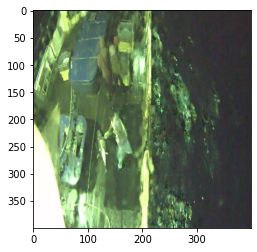

In [23]:
plt.imshow(X[2])

In [24]:
proper['HUMAN'][2]

1.0

# Creating the Y numpy array

In [25]:
proper_sub= proper.head(1000)

y = np.array(proper_sub.drop(['img_id'],axis=1))
y.shape

(1000, 15)

# Here I split the data into each of its part

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# 

# Creating the Model and Summary

In [27]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='sigmoid'))

2022-04-29 19:19:08.194260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 19:19:08.321227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 19:19:08.322087: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 19:19:08.323636: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 93, 93, 64)        5

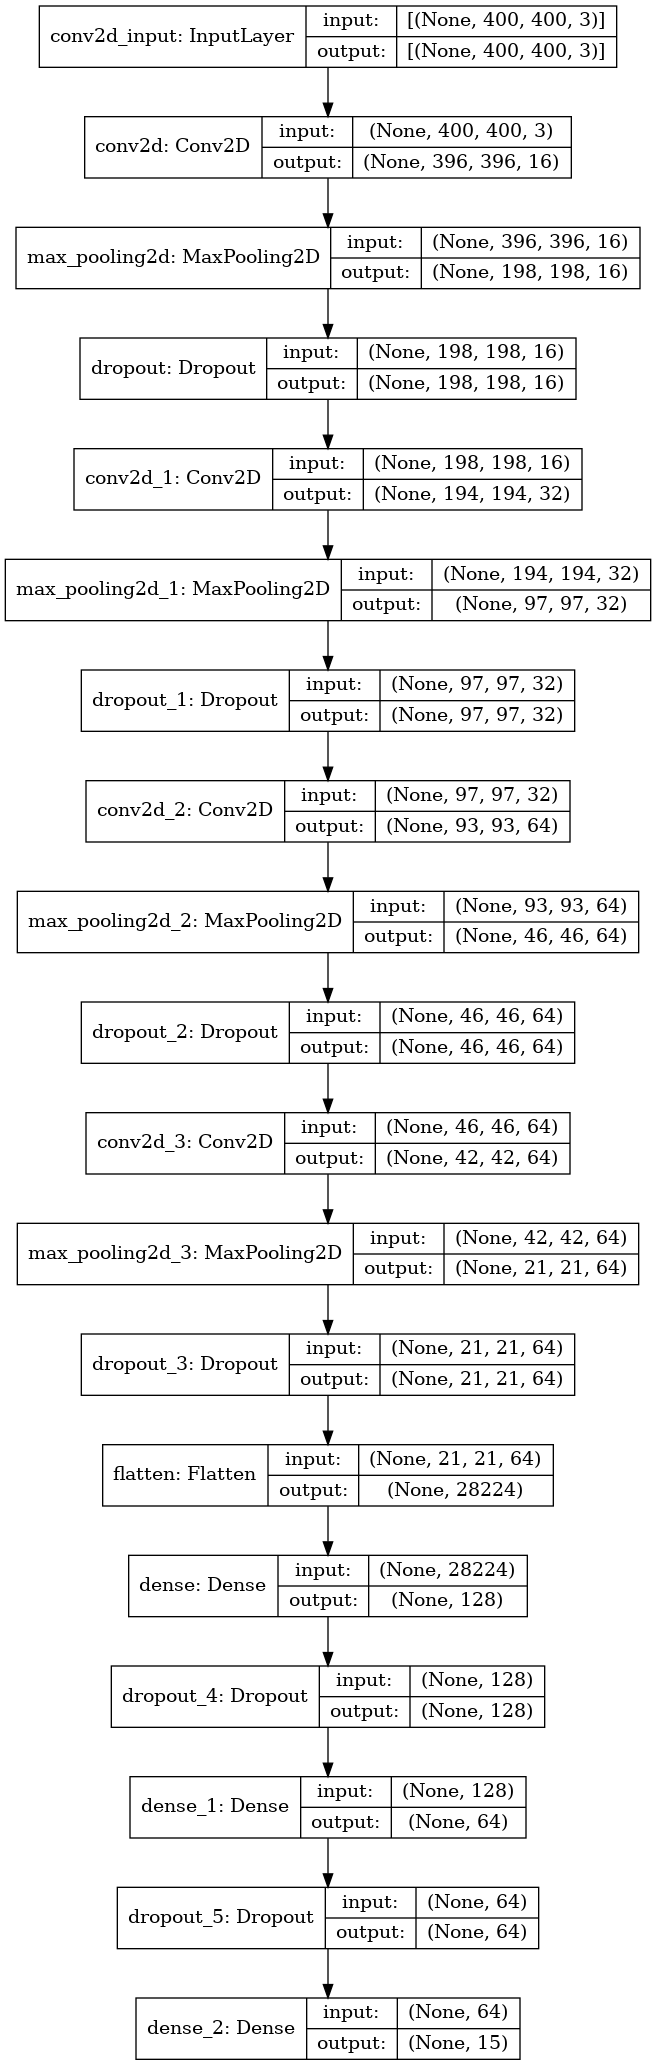

In [28]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Compiling and fitting the Model

In [29]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
es = EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss') # Early stopping

In [31]:
model.fit(X_train, y_train, batch_size=64, 
                            epochs=10, validation_split=0.2, 
                            callbacks=[es])

2022-04-29 19:19:15.443407: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1382400000 exceeds 10% of free system memory.
2022-04-29 19:19:16.894840: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1382400000 exceeds 10% of free system memory.
2022-04-29 19:19:17.907915: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-04-29 19:19:18.656149: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.
2022-04-29 19:19:18.656582: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.
2022-04-29 19:19:18.770602: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.
2022-04-29 19:19:19.687565: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


12/12 [==============================] - 13s 346ms/step - loss: 0.6267 - accuracy: 0.2361 - val_loss: 0.5966 - val_accuracy: 0.9389
Epoch 2/10
12/12 [==============================] - 2s 169ms/step - loss: 0.4798 - accuracy: 0.5000 - val_loss: 0.4732 - val_accuracy: 0.9389
Epoch 3/10
12/12 [==============================] - 2s 172ms/step - loss: 0.3850 - accuracy: 0.7625 - val_loss: 0.3935 - val_accuracy: 0.9389
Epoch 4/10
12/12 [==============================] - 2s 177ms/step - loss: 0.3277 - accuracy: 0.8750 - val_loss: 0.3102 - val_accuracy: 0.9389
Epoch 5/10
12/12 [==============================] - 2s 170ms/step - loss: 0.2907 - accuracy: 0.9250 - val_loss: 0.2890 - val_accuracy: 0.9389
Epoch 6/10
12/12 [==============================] - 2s 169ms/step - loss: 0.2676 - accuracy: 0.9403 - val_loss: 0.3150 - val_accuracy: 0.9389
Epoch 7/10
12/12 [==============================] - 2s 165ms/step - loss: 0.2578 - accuracy: 0.9486 - val_loss: 0.2471 - val_accuracy: 0.9389
Epoch 8/10
12/12

# Evaluating the Model


The model seems has accuracy of 95%, which is very impressive. 

In [32]:
print(model.evaluate(X_test, y_test))



4/4 [==============================] - 1s 51ms/step - loss: 0.2203 - accuracy: 0.9500
[0.2202599197626114, 0.949999988079071]


In [33]:
preds = model.predict(X_test[:10])

# Model Diagnostics

In [34]:
np.round(preds)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [35]:
y_test[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
#['HUMAN', 'NoF', 'YFT', 'ALB', 'OTH', 'BILL', 
#'DOL', 'BET', 'SKJ', 'LAG', 'SHARK', 'OIL', 'PLS', 'TUNA', 'WATER']
import numpy as np
from sklearn.metrics import confusion_matrix

preds = model.predict(X_test)
y_pred = np.round(preds) #<TODO: convert the probabilities to classes with numpy>

conf_human=confusion_matrix(y_test[:,0], y_pred[:,0])
conf_nof=confusion_matrix(y_test[:,1], y_pred[:,1])
conf_yft=confusion_matrix(y_test[:,2], y_pred[:,2])
#'ALB', 'OTH', 'BILL',
conf_alb=confusion_matrix(y_test[:,3], y_pred[:,3])
conf_oth=confusion_matrix(y_test[:,4], y_pred[:,4])
conf_bill=confusion_matrix(y_test[:,5], y_pred[:,5])
#'DOL', 'BET', 'SKJ'
conf_dol=confusion_matrix(y_test[:,6], y_pred[:,6])
conf_bet=confusion_matrix(y_test[:,7], y_pred[:,7])
conf_sky=confusion_matrix(y_test[:,8], y_pred[:,8])
#'LAG', 'SHARK', 'OIL'
conf_lag=confusion_matrix(y_test[:,9], y_pred[:,9])
conf_shark=confusion_matrix(y_test[:,10], y_pred[:,10])
conf_oil=confusion_matrix(y_test[:,11], y_pred[:,11])
#'PLS', 'TUNA', 'WATER'
conf_pls=confusion_matrix(y_test[:,12], y_pred[:,12])
conf_tuna=confusion_matrix(y_test[:,13], y_pred[:,13])
conf_water=confusion_matrix(y_test[:,14], y_pred[:,14])


print(conf_human)

[[ 0  5]
 [ 0 95]]


conf_human
conf_nof
conf_yft

conf_alb
conf_oth
conf_bill

conf_dol
conf_bet
conf_sky

conf_lag
conf_shark
conf_oil

conf_pls
conf_tuna
conf_water

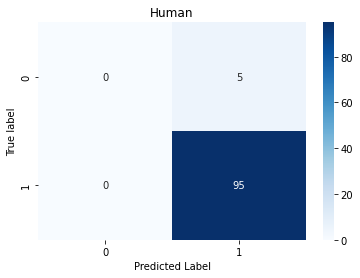

In [37]:
import seaborn as sns
ax_human = sns.heatmap(conf_human, annot=True, fmt='d', cmap='Blues') 
ax_human.set(xlabel='Predicted Label',
       ylabel='True label', title= 'Human');


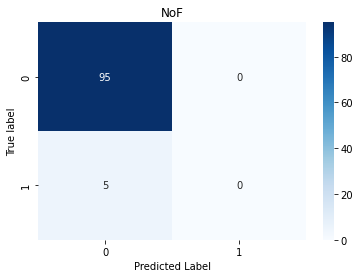

In [38]:
ax_nof = sns.heatmap(conf_nof, annot=True, fmt='d', cmap='Blues') 
ax_nof.set(xlabel='Predicted Label',
       ylabel='True label', title= 'NoF');

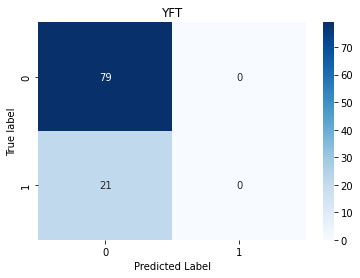

In [39]:
ax_yft = sns.heatmap(conf_yft, annot=True, fmt='d', cmap='Blues') 
ax_yft.set(xlabel='Predicted Label',
       ylabel='True label', title= 'YFT');

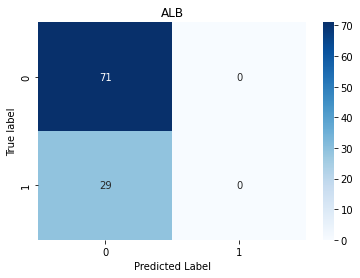

In [40]:
ax_alb = sns.heatmap(conf_alb, annot=True, fmt='d', cmap='Blues') 
ax_alb.set(xlabel='Predicted Label',
       ylabel='True label', title= 'ALB');

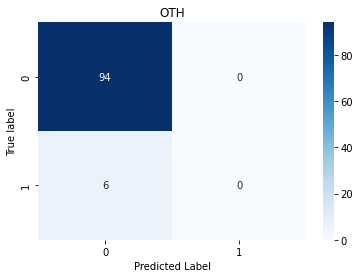

In [41]:
ax_oth = sns.heatmap(conf_oth, annot=True, fmt='d', cmap='Blues') 
ax_oth.set(xlabel='Predicted Label',
       ylabel='True label', title= 'OTH');

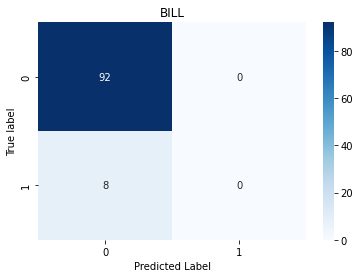

In [42]:
ax_bill = sns.heatmap(conf_bill, annot=True, fmt='d', cmap='Blues') 
ax_bill.set(xlabel='Predicted Label',
       ylabel='True label', title= 'BILL');

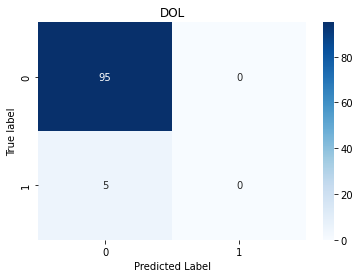

In [43]:
ax_dol = sns.heatmap(conf_dol, annot=True, fmt='d', cmap='Blues') 
ax_dol.set(xlabel='Predicted Label',
       ylabel='True label', title= 'DOL');

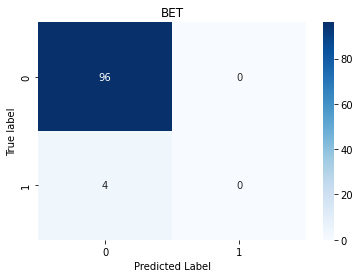

In [44]:
ax_bet = sns.heatmap(conf_bet, annot=True, fmt='d', cmap='Blues') 
ax_bet.set(xlabel='Predicted Label',
       ylabel='True label', title= 'BET');

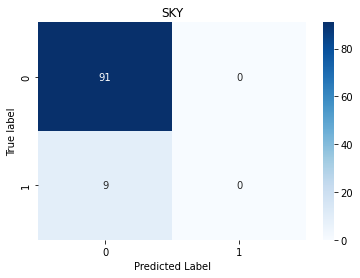

In [45]:
ax_sky = sns.heatmap(conf_sky, annot=True, fmt='d', cmap='Blues') 
ax_sky.set(xlabel='Predicted Label',
       ylabel='True label', title= 'SKY');

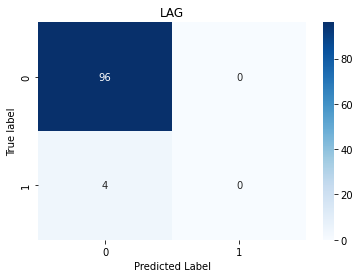

In [46]:
ax_lag = sns.heatmap(conf_lag, annot=True, fmt='d', cmap='Blues') 
ax_lag.set(xlabel='Predicted Label',
       ylabel='True label', title= 'LAG');

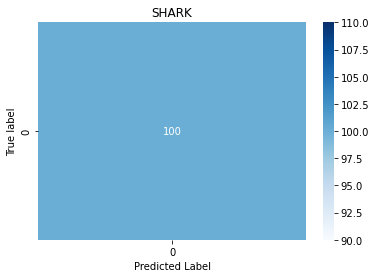

In [47]:
ax_shark = sns.heatmap(conf_shark, annot=True, fmt='d', cmap='Blues') 
ax_shark.set(xlabel='Predicted Label',
       ylabel='True label', title= 'SHARK');

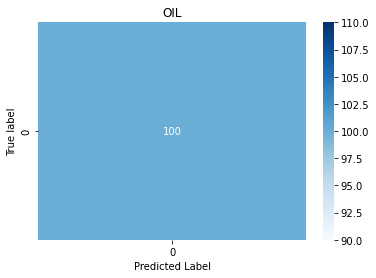

In [48]:
ax_oil = sns.heatmap(conf_oil, annot=True, fmt='d', cmap='Blues') 
ax_oil.set(xlabel='Predicted Label',
       ylabel='True label', title= 'OIL');

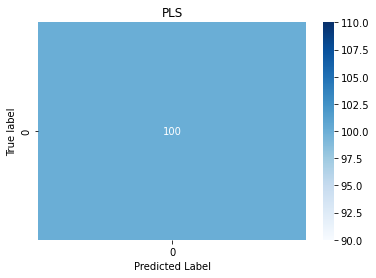

In [49]:
ax_pls = sns.heatmap(conf_pls, annot=True, fmt='d', cmap='Blues') 
ax_pls.set(xlabel='Predicted Label',
       ylabel='True label', title= 'PLS');

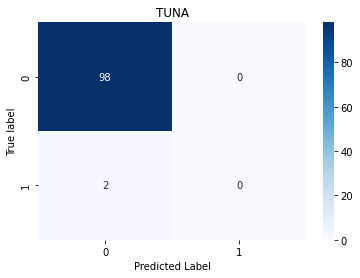

In [50]:
ax_tuna = sns.heatmap(conf_tuna, annot=True, fmt='d', cmap='Blues') 
ax_tuna.set(xlabel='Predicted Label',
       ylabel='True label', title= 'TUNA');

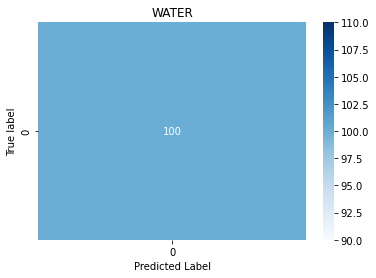

In [51]:
ax_water = sns.heatmap(conf_water, annot=True, fmt='d', cmap='Blues') 
ax_water.set(xlabel='Predicted Label',
       ylabel='True label', title= 'WATER');

In [52]:
Y_train= pd.DataFrame(y_train)
Y_test= pd.DataFrame(y_test)
Y_train.columns
(Y_train.groupby(0).size())



0
0.0     34
1.0    866
dtype: int64

In [53]:
y_labels = ['HUMAN', 'NoF', 'YFT', 'ALB', 'OTH', 'BILL', 'DOL', 'BET', 'SKJ', 'LAG', 'SHARK', 'OIL', 'PLS', 'TUNA', 'WATER']
print(len(y_labels))
counts = []
for i in range(0,15):
    x = list(Y_train.groupby(i).size())
    counts.append(x[0]/1000)
print(counts)
print(len(counts))
frequency= [round(1-i, 3) for i in counts]
print(frequency)
print(len(frequency))

15
[0.034, 0.882, 0.689, 0.614, 0.839, 0.866, 0.863, 0.837, 0.832, 0.884, 0.891, 0.9, 0.899, 0.898, 0.897]
15
[0.966, 0.118, 0.311, 0.386, 0.161, 0.134, 0.137, 0.163, 0.168, 0.116, 0.109, 0.1, 0.101, 0.102, 0.103]
15


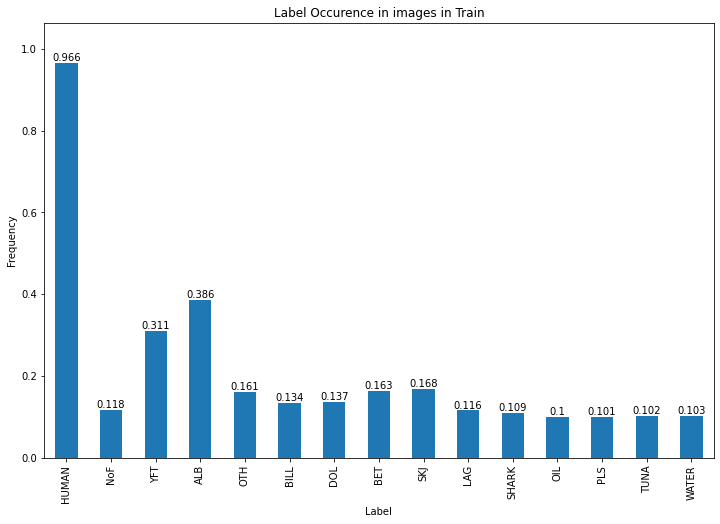

In [54]:
df_counts = pd.DataFrame({'Frequency': frequency}, index=y_labels)
ax = df_counts.plot(kind='bar', figsize=(12, 8), title='Label Occurence in images in Train',
             xlabel='Label', ylabel='Frequency', legend=False)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [55]:
Y_test.groupby(3).size()

3
0.0    71
1.0    29
dtype: int64

In [56]:
print(len(y_labels))
counts = []
for i in range(0,15):
    x = list(Y_test.groupby(i).size())
    counts.append(x[0]/100)
print(counts)
print(len(counts))
frequency= [round(1-i, 3) for i in counts]
print(frequency)
print(len(frequency))

15
[0.05, 0.95, 0.79, 0.71, 0.94, 0.92, 0.95, 0.96, 0.91, 0.96, 1.0, 1.0, 1.0, 0.98, 1.0]
15
[0.95, 0.05, 0.21, 0.29, 0.06, 0.08, 0.05, 0.04, 0.09, 0.04, 0.0, 0.0, 0.0, 0.02, 0.0]
15


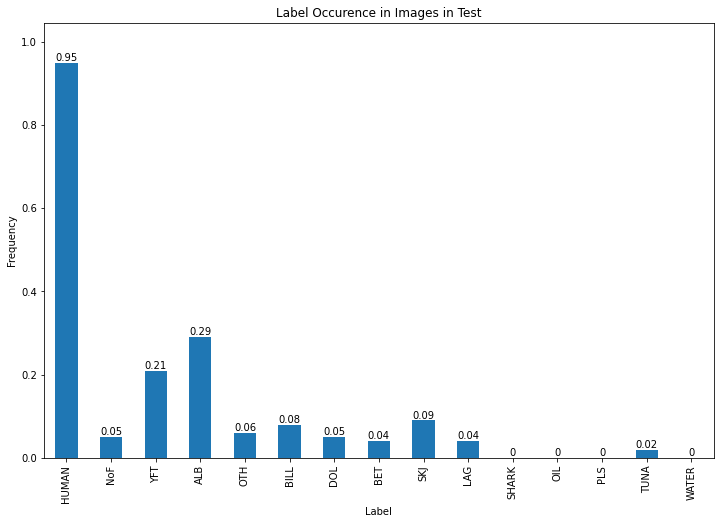

In [57]:
df_counts = pd.DataFrame({'Frequency': frequency}, index=y_labels)
ax = df_counts.plot(kind='bar', figsize=(12, 8), title='Label Occurence in Images in Test',
             xlabel='Label', ylabel='Frequency', legend=False)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)